In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.collections import PatchCollection

sns.set(style='whitegrid', font_scale=2)
sns.despine()

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)

In [31]:
patches = []
patches.append(plt.matplotlib.patches.Circle((0.2, 0.8), 0.15))
patches.append(plt.matplotlib.patches.Circle((0.2, 0.4), 0.15))
patches.append(plt.matplotlib.patches.Circle((0.8, 0.2), 0.15))
patches.append(plt.matplotlib.patches.Circle((0.5, 0.8), 0.15))

In [32]:
pc = PatchCollection(patches, alpha=0.3)

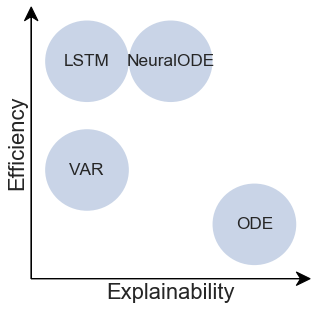

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
ax.add_collection(pc)
ax.text(0.2, 0.8, 'LSTM', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize': 'xx-large'})
ax.text(0.2, 0.4, 'VAR', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize': 'xx-large'})
ax.text(0.8, 0.2, 'ODE', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize': 'xx-large'})
ax.text(0.5, 0.8, 'NeuralODE', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel('Explainability')
ax.set_ylabel('Efficiency')
arrowed_spines(fig, ax)